In [1]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import os
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import norm
import scipy.stats as ss
from itertools import combinations
from scipy.stats import boxcox, kstest, shapiro

chunk = 2*10**6

In [4]:
df = pd.read_csv('data.csv')

print(df.shape)
df.iloc[0,:].T

(20468, 29)


age                                                         12
annualincome                                            168147
calldroprate                                              0.06
callfailurerate                                              0
callingnum                                          4251078442
customerid                                                   1
customersuspended                                          Yes
education                               Bachelor or equivalent
gender                                                    Male
homeowner                                                  Yes
maritalstatus                                           Single
monthlybilledamount                                         71
noadditionallines                                           \N
numberofcomplaints                                           0
numberofmonthunpaid                                          7
numdayscontractequipmentplanexpiring                   

In [22]:
df.groupby(['month']).size()

month
1    9475
2    9466
3    1527
dtype: int64

In [23]:
df.loc[df['churn']==1].groupby(['month']).size()

month
1    856
2    857
3    150
dtype: int64

In [75]:
dupl = df['customerid'].value_counts().reset_index()
cust = dupl.loc[dupl['customerid']==2]['index']

In [71]:
df.loc[df['customerid'].isin(cust)][['customerid', 'churn']].groupby('customerid')['churn'].sum().reset_index()['churn'].unique()

array([0, 2], dtype=int64)

In [76]:
df.loc[df['customerid'].isin(cust)]['month'].value_counts()

1    7912
2    7908
3      14
Name: month, dtype: int64

In [88]:
tt = df.loc[(df['customerid'].isin(cust)) & (df['month']!=3)].drop(['year'], axis=1)
tt.groupby('customerid').nunique().sum()

age                                      7917
annualincome                             7917
calldroprate                             7917
callfailurerate                          7917
callingnum                               7917
customerid                               7917
customersuspended                        7917
education                                7917
gender                                   7917
homeowner                                7917
maritalstatus                            7917
monthlybilledamount                      7917
noadditionallines                        7917
numberofcomplaints                       7917
numberofmonthunpaid                      7917
numdayscontractequipmentplanexpiring     7917
occupation                               7917
penaltytoswitch                          7917
state                                    7917
totalminsusedinlastmonth                 7917
unpaidbalance                            7917
usesinternetservice               

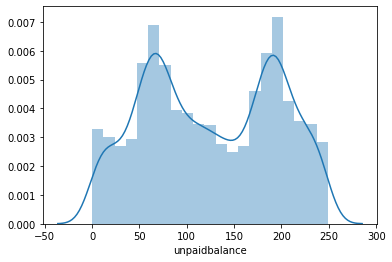

In [184]:
sns.distplot(df.loc[(df['month']==2) & (df['churn']==0)]['unpaidbalance']);

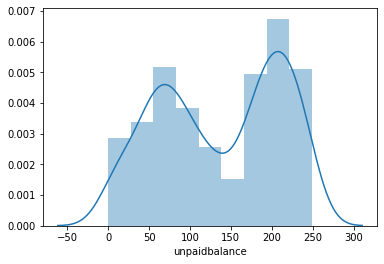

In [183]:
sns.distplot(df.loc[(df['month']==2) & (df['churn']==1)]['unpaidbalance']);

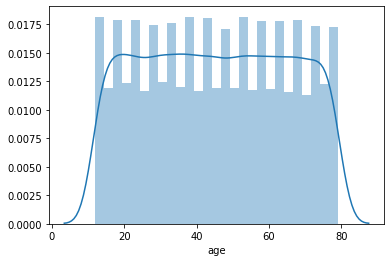

In [170]:
sns.distplot(df['age'])

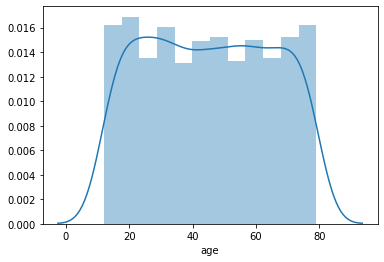

In [177]:
sns.distplot(df.loc[df['month']==3]['age']);

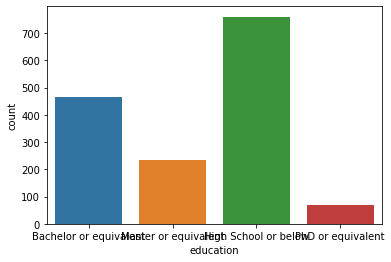

In [165]:
sns.countplot(df.loc[df['month']==3]['education']);

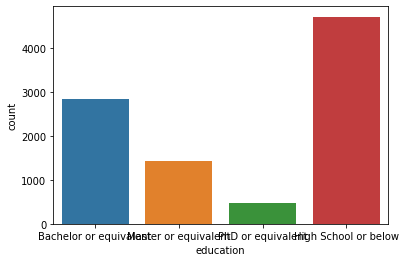

In [166]:
sns.countplot(df.loc[df['month']==2]['education']);

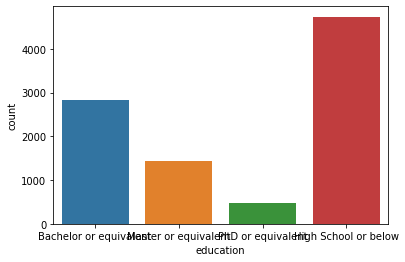

In [167]:
sns.countplot(df.loc[df['month']==1]['education']);

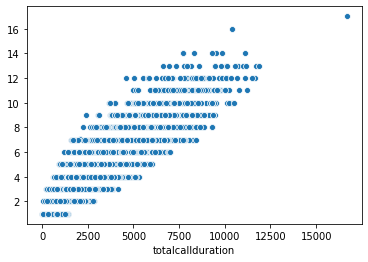

In [144]:
sns.scatterplot(x=tt.loc[tt['month']==1]["totalcallduration"], y=tt.loc[tt['month']==1]["totalcallduration"]/tt.loc[tt['month']==1]["avgcallduration"]);

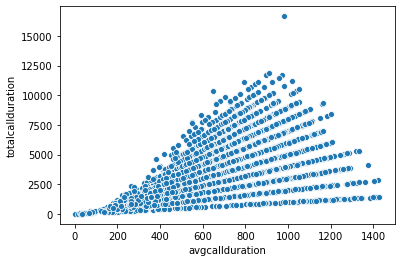

In [143]:
sns.scatterplot(x=tt.loc[tt['month']==1]["avgcallduration"], y=tt.loc[tt['month']==1]["totalcallduration"]);

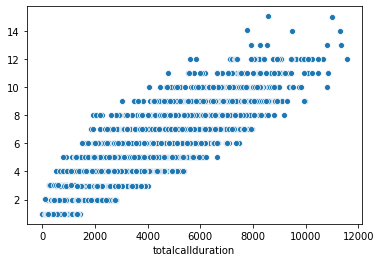

In [146]:
sns.scatterplot(x=tt.loc[tt['month']==2]["totalcallduration"], y=tt.loc[tt['month']==2]["totalcallduration"]/tt.loc[tt['month']==2]["avgcallduration"]);

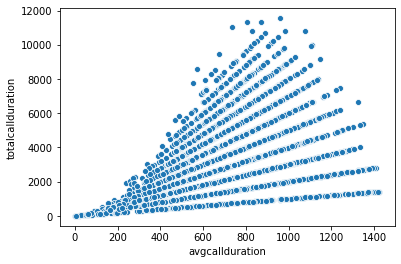

In [141]:
sns.scatterplot(x=tt.loc[tt['month']==2]["avgcallduration"], y=tt.loc[tt['month']==2]["totalcallduration"]);

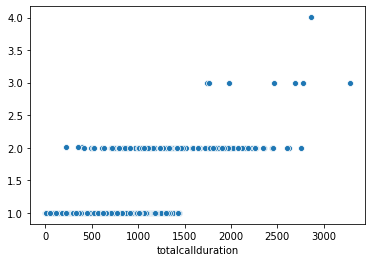

In [148]:
sns.scatterplot(x=df.loc[df['month']==3]["totalcallduration"], y=df.loc[df['month']==3]["totalcallduration"]/df.loc[df['month']==3]["avgcallduration"]);

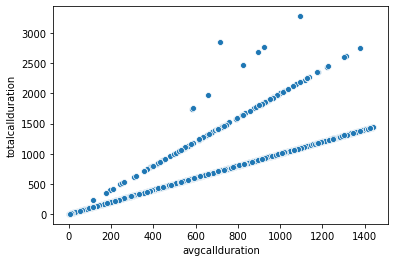

In [140]:
sns.scatterplot(x=df.loc[df['month']==3]["avgcallduration"], y=df.loc[df['month']==3]["totalcallduration"]);

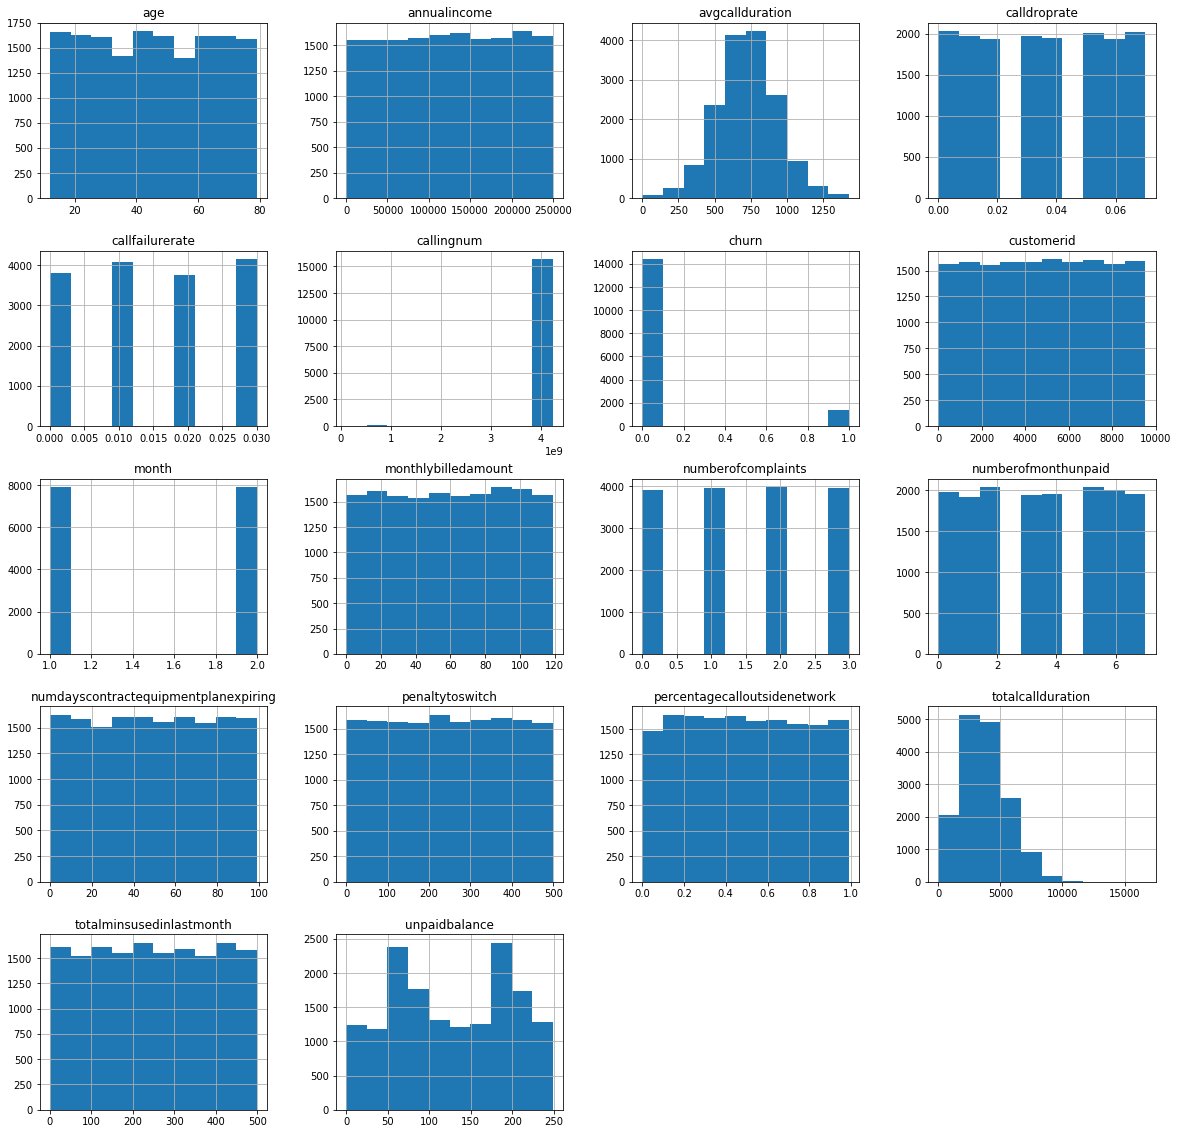

In [131]:
tt.hist(figsize=(20,20));

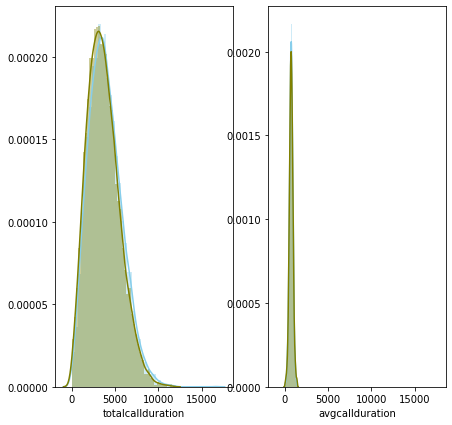

In [127]:
# plot
f, axes = plt.subplots(1, 2, figsize=(7, 7), sharex=True);
sns.distplot(tt.loc[tt['month']==1]["totalcallduration"] , color="skyblue", ax=axes[0]);
sns.distplot(tt.loc[tt['month']==2]["totalcallduration"] , color="olive", ax=axes[0]);
sns.distplot(tt.loc[tt['month']==1]["avgcallduration"] , color="skyblue", ax=axes[1]);
sns.distplot(tt.loc[tt['month']==2]["avgcallduration"] , color="olive", ax=axes[1]);

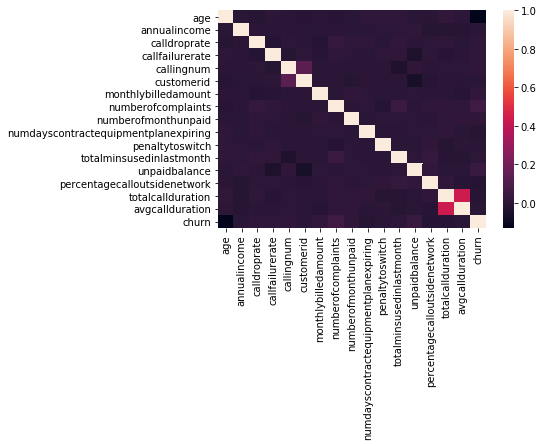

In [86]:
sns.heatmap(df.corr());

In [ ]:
sns.

In [44]:
df.loc[df['customerid']==537].T

,1161,1162,1163
age,21,21,21
annualincome,168146,168146,168146
calldroprate,0.04,0.04,0.04
callfailurerate,0.02,0.02,0.02
callingnum,4251021127,4251021127,4251021127
customerid,537,537,537
customersuspended,Yes,Yes,Yes
education,High School or below,High School or below,High School or below
gender,Male,Male,Male
homeowner,Yes,Yes,Yes


In [11]:
df.shape

(20468, 29)

In [16]:
df.drop_duplicates(df.columns[:-1]).shape

(20467, 29)

In [6]:
df.churn.value_counts(normalize=True)
# Несбалансированные классы

0    0.90898
1    0.09102
Name: churn, dtype: float64

In [7]:
df.columns

Index(['age', 'annualincome', 'calldroprate', 'callfailurerate', 'callingnum',
       'customerid', 'customersuspended', 'education', 'gender', 'homeowner',
       'maritalstatus', 'monthlybilledamount', 'noadditionallines',
       'numberofcomplaints', 'numberofmonthunpaid',
       'numdayscontractequipmentplanexpiring', 'occupation', 'penaltytoswitch',
       'state', 'totalminsusedinlastmonth', 'unpaidbalance',
       'usesinternetservice', 'usesvoiceservice',
       'percentagecalloutsidenetwork', 'totalcallduration', 'avgcallduration',
       'churn', 'year', 'month'],
      dtype='object')

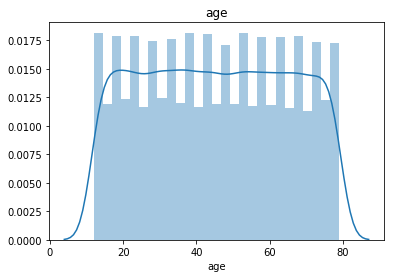

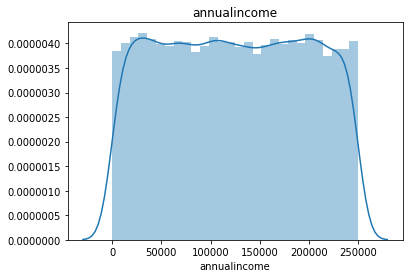

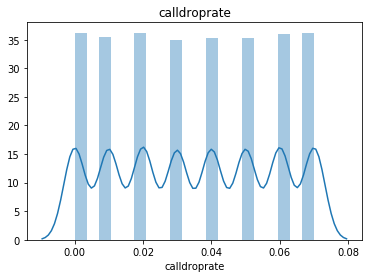

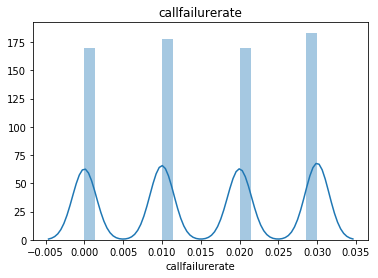

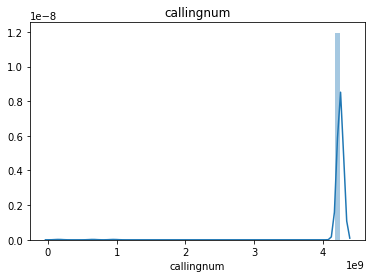

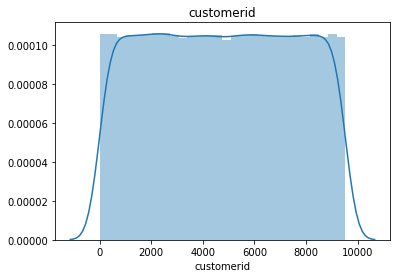

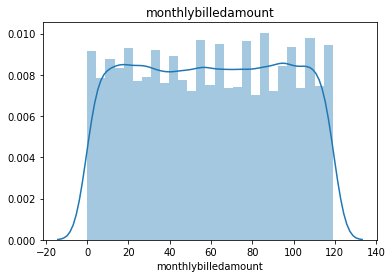

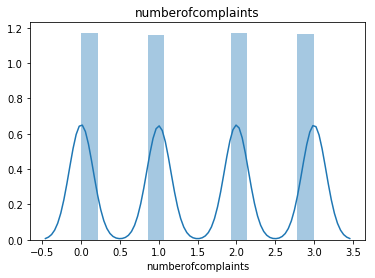

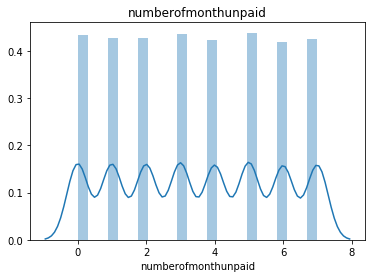

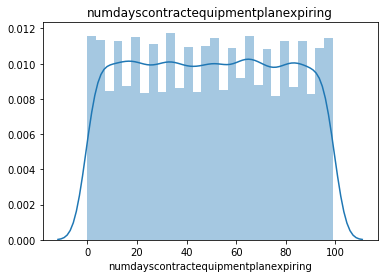

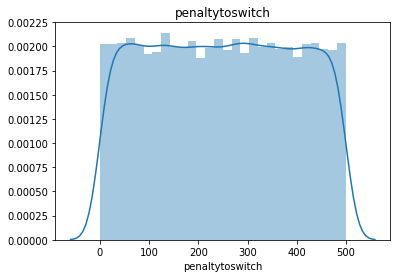

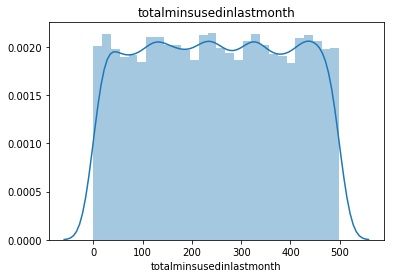

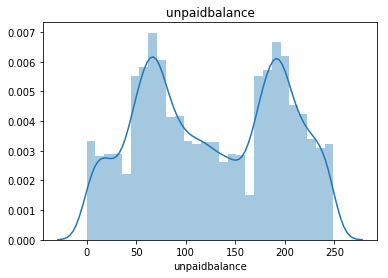

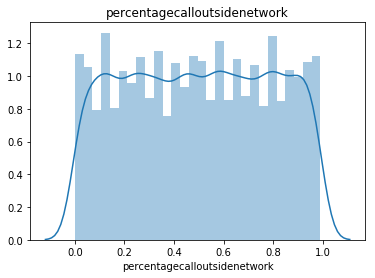

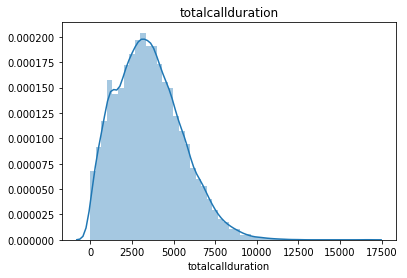

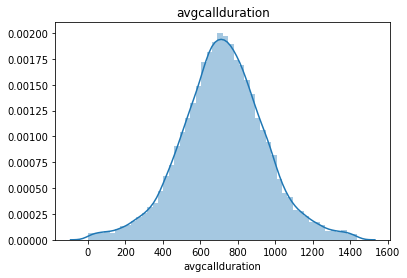

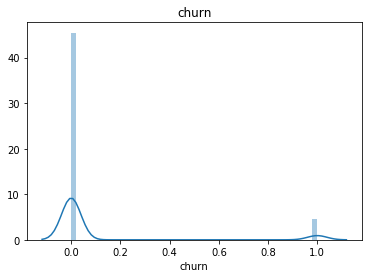

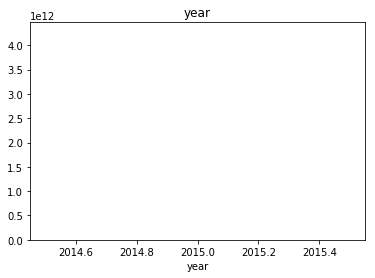

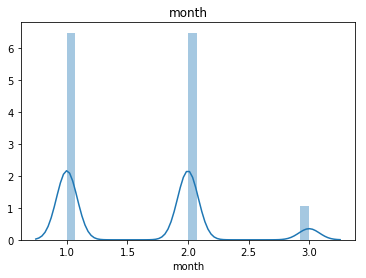

In [10]:
for col in df.describe().columns:
    plt.figure()
    sns.distplot(df[col])
    plt.title(col)

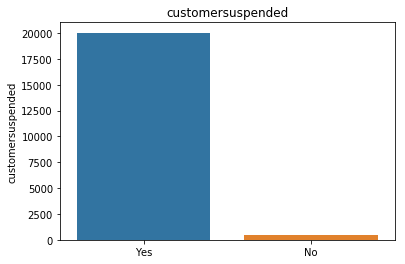

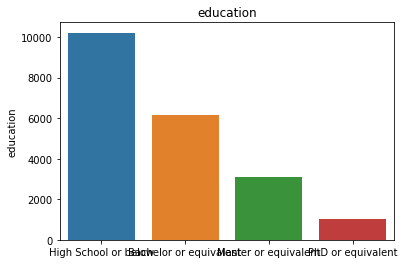

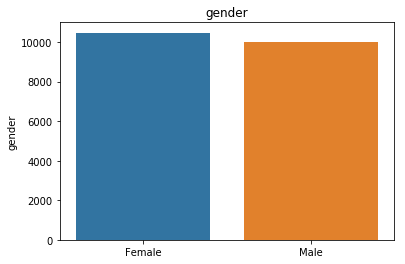

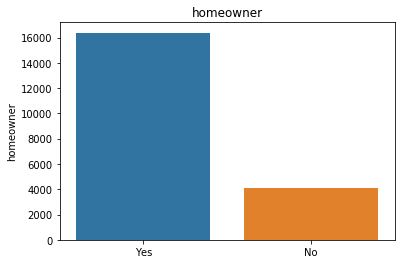

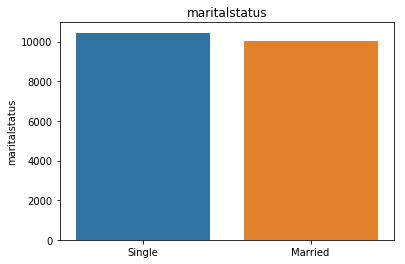

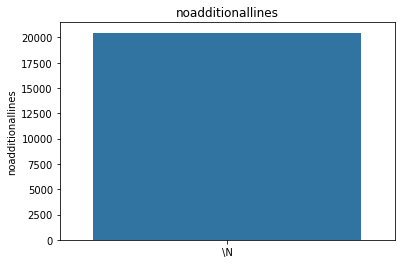

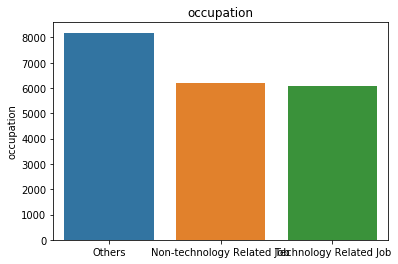

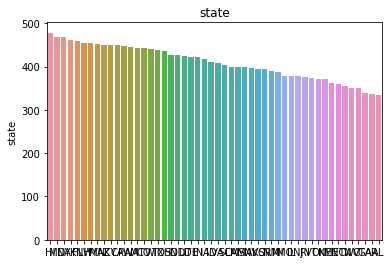

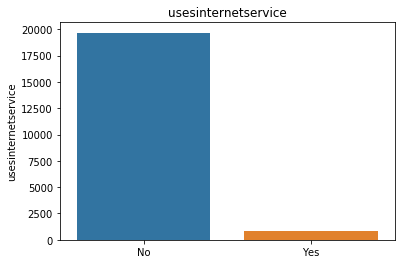

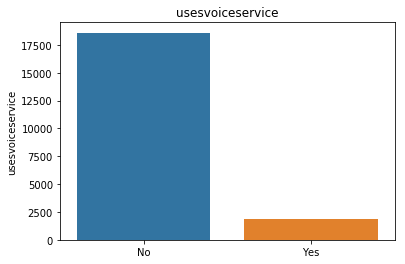

In [60]:
obj_features = list(df.dtypes.loc[df.dtypes == 'object'].index)

for cat in obj_features:
    plt.figure()
    sns.barplot(x=df[cat].value_counts().index, y=df[cat].value_counts())
    plt.title(cat)

transformed: 0.9797988065470604, not transformed: 0.9881459002876977,       boxcox: 0.9824805750065176


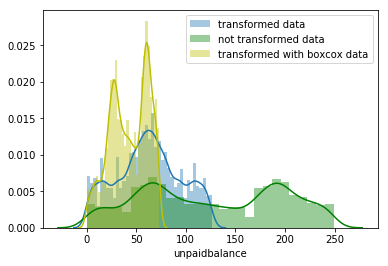

In [79]:
z = pd.DataFrame(df['unpaidbalance'])
z['transformed'] = abs(z.unpaidbalance - z.unpaidbalance.mean())

print(f'transformed: {kstest(z.transformed, "norm")[0]}, not transformed: {kstest(z.unpaidbalance, "norm")[0]}, \
      boxcox: {kstest(boxcox(z.loc[z.unpaidbalance > 0, "unpaidbalance"])[0], "norm")[0]}')
sns.distplot(z.transformed, label='transformed data')
sns.distplot(z.unpaidbalance, color='g', label='not transformed data')
sns.distplot(boxcox(z.loc[z.unpaidbalance > 0, 'unpaidbalance'])[0], color='y', label='transformed with boxcox data')
plt.legend()

In [65]:
df.groupby(['month', 'churn']).agg({'year': 'count'})
# Буду использовать 3 месяц для валидации

year
month churn      
1     0      8619
      1       856
2     0      8609
      1       857
3     0      1377
      1       150

In [74]:
df[df.customerid == (set(df.loc[df.month == 1, 'customerid'])&set(df.loc[df.month == 2, 'customerid'])).pop()]

,age,annualincome,calldroprate,callfailurerate,callingnum,customerid,customersuspended,education,gender,homeowner,...,totalminsusedinlastmonth,unpaidbalance,usesinternetservice,usesvoiceservice,percentagecalloutsidenetwork,totalcallduration,avgcallduration,churn,year,month
0,12,168147,0.06,0.0,4251078442,1,Yes,Bachelor or equivalent,Male,Yes,...,15,19,No,No,0.82,5971,663,0,2015,1
1,12,168147,0.06,0.0,4251078442,1,Yes,Bachelor or equivalent,Male,Yes,...,15,19,No,No,0.82,3981,995,0,2015,2


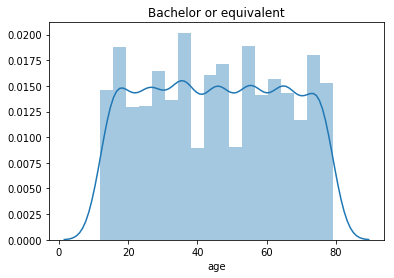

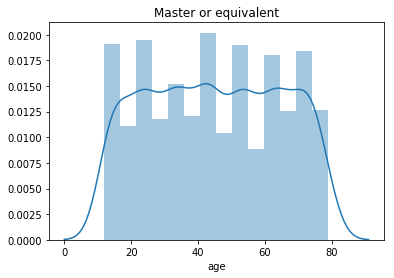

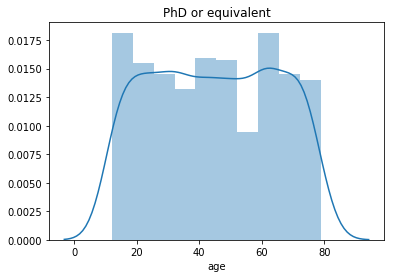

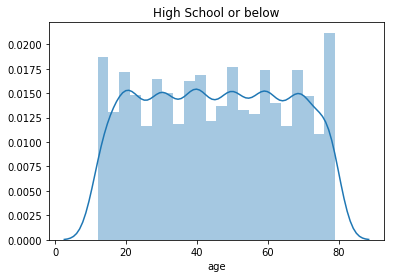

In [11]:
for degree in df.education.drop_duplicates():
    plt.figure()
    sns.distplot(df.loc[(df.education == degree)&(df.month < 3), 'age'])
    plt.title(degree)

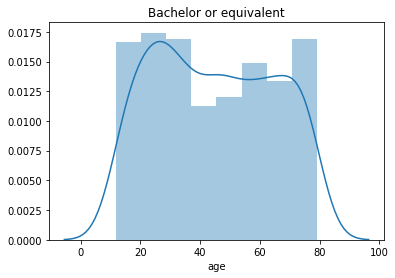

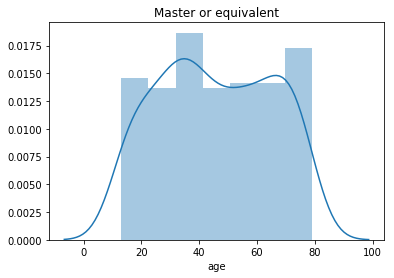

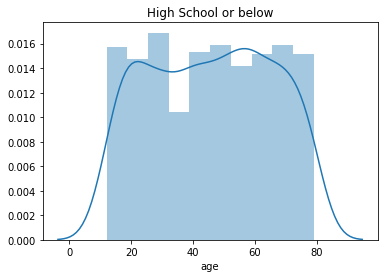

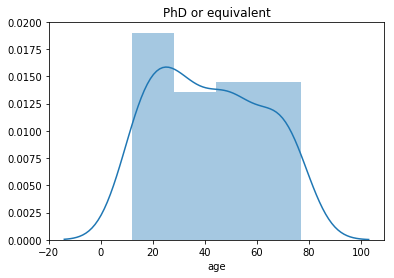

In [12]:
for degree in df[df.month == 3].education.drop_duplicates():
    plt.figure()
    sns.distplot(df.loc[(df.education == degree)&(df.month == 3), 'age'])
    plt.title(degree)

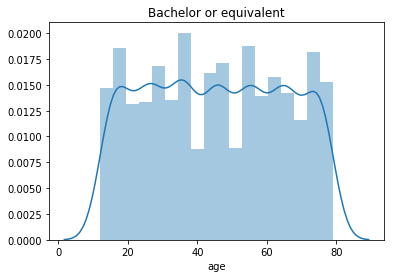

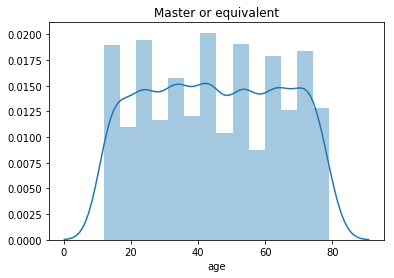

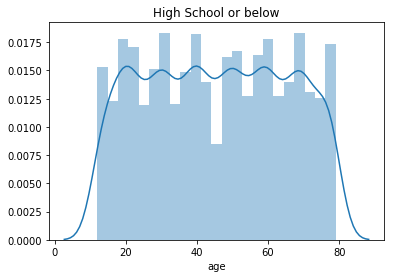

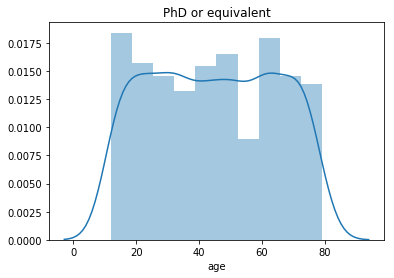

In [64]:
for degree in df[df.month == 3].education.drop_duplicates():
    plt.figure()
    sns.distplot(df.loc[df.education == degree, 'age'])
    plt.title(degree)

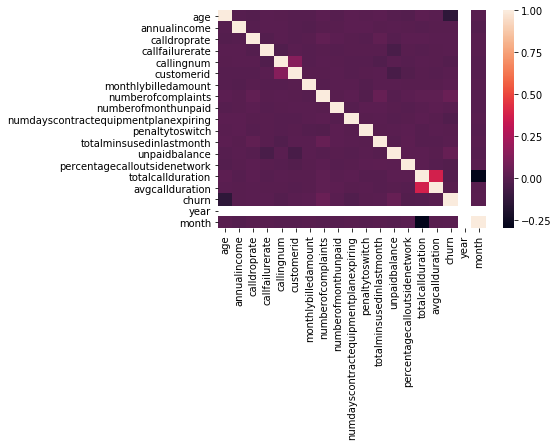

In [13]:
sns.heatmap(df.corr())

In [14]:
# Положительная корелляция
corr_pairs = df.corr().stack().reset_index().sort_values(by=[0], ascending=False)
corr_pairs = corr_pairs[corr_pairs.level_0 != corr_pairs.level_1]
corr_pairs_cols = corr_pairs.level_0.drop_duplicates()
corr_pairs['level_2'] = corr_pairs['level_0'].shift(1)
corr_pairs = corr_pairs.loc[corr_pairs.level_1 != corr_pairs.level_2].drop(columns=['level_2'])
corr_pairs.head(10)

,level_0,level_1,0
284,avgcallduration,totalcallduration,0.379105
94,customerid,callingnum,0.142501
295,churn,numberofcomplaints,0.054646
137,numberofcomplaints,totalminsusedinlastmonth,0.047927
232,unpaidbalance,churn,0.047482
43,calldroprate,numberofcomplaints,0.030443
47,calldroprate,totalminsusedinlastmonth,0.025049
259,totalcallduration,numberofcomplaints,0.019205
252,totalcallduration,age,0.014669
245,percentagecalloutsidenetwork,totalminsusedinlastmonth,0.013778


In [15]:
# Отрицательная корелляция
corr_pairs = df.corr().stack().reset_index().sort_values(by=[0], ascending=True)
corr_pairs = corr_pairs[corr_pairs.level_0 != corr_pairs.level_1]
corr_pairs_cols = corr_pairs.level_0.drop_duplicates()
corr_pairs['level_2'] = corr_pairs['level_0'].shift(1)
corr_pairs = corr_pairs.loc[corr_pairs.level_1 != corr_pairs.level_2].drop(columns=['level_2'])
corr_pairs.head(10)

,level_0,level_1,0
320,month,totalcallduration,-0.296411
16,age,churn,-0.137655
102,customerid,unpaidbalance,-0.052374
219,unpaidbalance,callfailurerate,-0.044276
83,callingnum,totalminsusedinlastmonth,-0.018402
178,numdayscontractequipmentplanexpiring,churn,-0.017892
239,percentagecalloutsidenetwork,customerid,-0.013650
250,percentagecalloutsidenetwork,churn,-0.012896
187,penaltytoswitch,numberofcomplaints,-0.012871
36,calldroprate,age,-0.010608


In [34]:
# Корр между кат фичами
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))


obj_features = list(df.dtypes.loc[df.dtypes == 'object'].index)
for pair in list(combinations(obj_features, 2)):
    i = cramers_v(df[pair[0]], df[pair[1]])
    if i >= .05:
        print(f'{pair[0]} and {pair[1]}: {i}')

homeowner and state: 0.05351709247254162


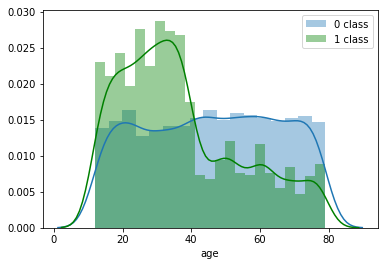

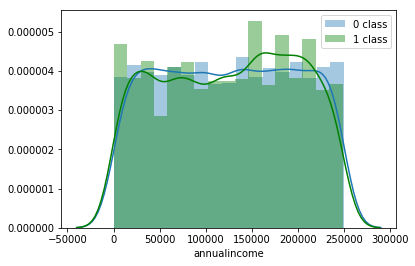

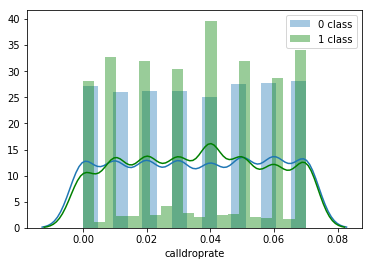

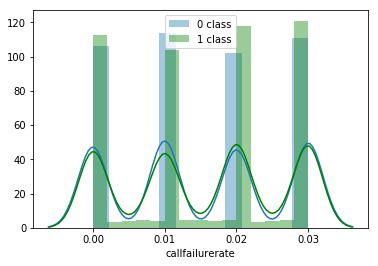

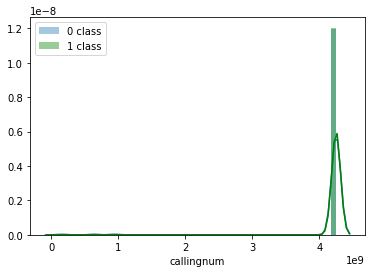

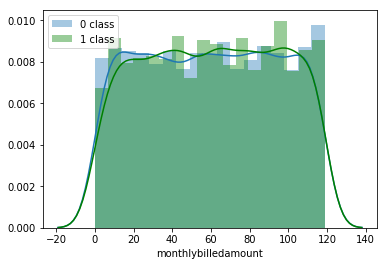

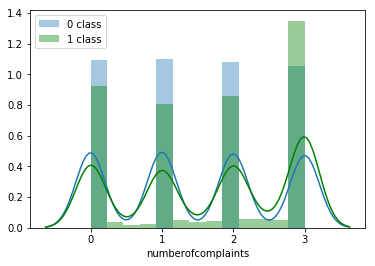

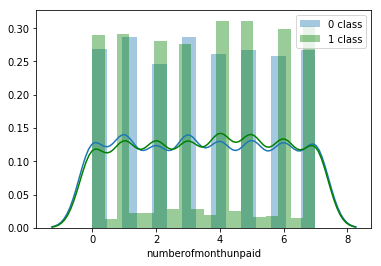

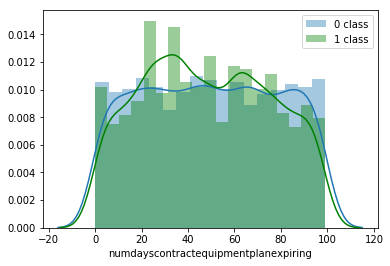

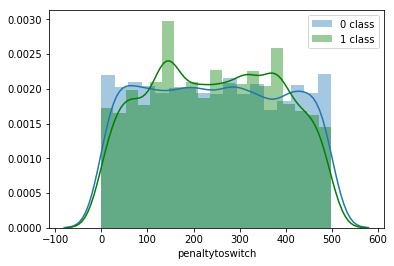

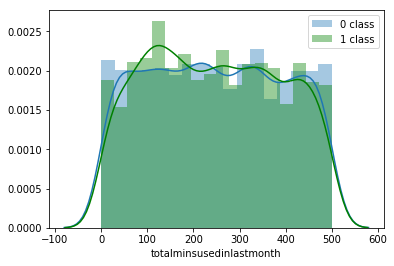

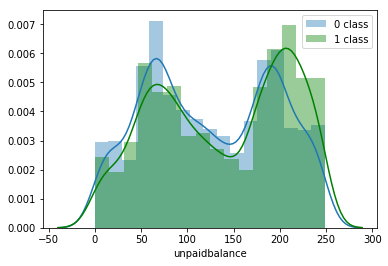

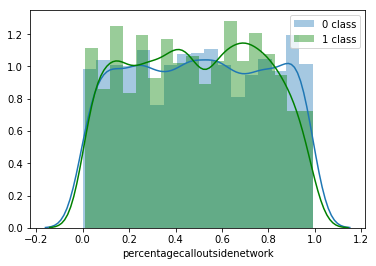

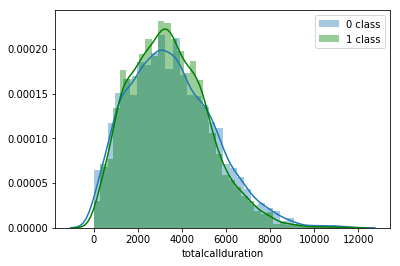

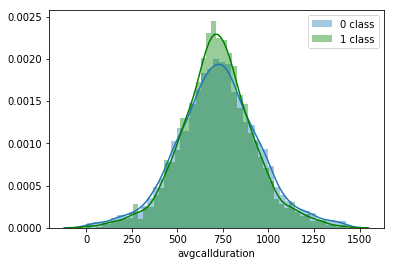

In [80]:
from imblearn.over_sampling import SMOTE

df_1 = df.loc[df.churn == 0].sample(frac=0.25, random_state=42).append(df.loc[df.churn == 1])[df.describe().columns]
df_1.drop(columns=['customerid', 'year', 'month'], inplace=True)
sm = SMOTE(random_state=42, k_neighbors=1, n_jobs=-1)
df_1x, df_1y = sm.fit_resample(df_1.drop(columns=['churn']), df_1['churn'])
df_1x = pd.DataFrame(data=df_1x, columns=[col for col in df_1.columns if col != 'churn'])
df_1x['churn'] = df_1y
for col in [col for col in df_1x.columns if col != 'churn']:
    plt.figure()
    sns.distplot(df_1x.loc[df_1x.churn == 0, col], label='0 class')
    sns.distplot(df_1x.loc[df_1x.churn == 1, col], color='g', label='1 class')
    plt.legend()